In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
DDoS = pd.read_csv("DDoS/DDoS.csv", skiprows=lambda x: x % 2 != 0)

In [3]:
DDoS.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
DDoS = DDoS.dropna()

In [5]:
DDoS = shuffle(DDoS)

In [6]:
DDoS = DDoS.reset_index()

In [7]:
DDoS

,index,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,974950,1843342,172.31.69.28-18.216.200.189-80-62841-6,172.31.69.28,80,18.216.200.189,62841,6,22/02/2018 12:14:56 AM,72620,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,ddos
1,1303754,333035,172.31.69.25-18.218.229.235-80-60011-6,18.218.229.235,60011,172.31.69.25,80,6,20/02/2018 11:07:50,1547536,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,ddos
2,5875695,1359193,172.31.66.49-216.58.211.162-51614-443-6,172.31.66.49,51614,216.58.211.162,443,6,20/02/2018 01:12:05,15904154,...,20,231634.0,0.0,231634.0,231634.0,15672520.0,0.000000,15672520.0,15672520.0,Benign
3,5283160,6390780,172.31.0.2-172.31.65.49-53-58372-17,172.31.65.49,58372,172.31.0.2,53,17,20/02/2018 08:51:19,309,...,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,6244073,7066593,172.31.67.59-175.101.5.231-445-62530-6,175.101.5.231,62530,172.31.67.59,445,6,20/02/2018 05:04:04,41218234,...,20,1771816.0,0.0,1771816.0,1771816.0,39165920.0,0.000000,39165920.0,39165920.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373392,5094579,4054487,172.31.66.66-52.1.90.207-52559-443-6,52.1.90.207,443,172.31.66.66,52559,6,20/02/2018 03:04:51,5,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
6373393,5756116,7501753,172.31.65.35-103.46.12.151-3389-49931-6,103.46.12.151,49931,172.31.65.35,3389,6,20/02/2018 09:53:31,8342141,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
6373394,1742433,634202,172.31.69.25-18.219.193.20-80-33584-6,18.219.193.20,33584,172.31.69.25,80,6,16/02/2018 11:19:13 PM,2389,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,ddos
6373395,159091,211624,172.31.69.28-18.216.200.189-80-62586-6,18.216.200.189,62586,172.31.69.28,80,6,21/02/2018 11:45:35 PM,4951,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,ddos


In [9]:
DDoS[:1000000].to_csv("DDoS_sample.csv")

In [8]:
DDoS["Label"].value_counts()

ddos      3236307
Benign    3137090
Name: Label, dtype: int64

In [10]:
DDoS.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [11]:
cat_cols = ['Flow ID','Src IP','Dst IP','Timestamp']

In [12]:
numerical_cols = list(set(DDoS.columns.values.tolist()) - set(cat_cols) - set(['Label']))

In [13]:
DDoS_cat = DDoS[['Flow ID','Src IP','Dst IP','Timestamp']]

In [14]:
DDoS_num = DDoS[numerical_cols]

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
DDoS_cat = DDoS_cat.apply(le.fit_transform)

In [17]:
DDoS_combined = np.hstack((DDoS_cat, DDoS_num))

In [18]:
DDoS_combined

array([[2.730156e+06, 8.659000e+03, 7.081000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [2.089143e+06, 2.543300e+04, 6.945000e+03, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       [1.416575e+06, 7.305000e+03, 8.801000e+03, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       ...,
       [2.741626e+06, 8.660000e+03, 7.081000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [2.958210e+06, 2.897700e+04, 2.827700e+04, ..., 0.000000e+00,
        0.000000e+00, 6.300000e+01],
       [1.971071e+06, 2.557900e+04, 6.901000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
DDoS_scaled = pd.DataFrame(scaler.fit_transform(DDoS_combined))

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# Chi_square feature selection

In [22]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [23]:
fit_feat = bestfeatures.fit(DDoS_scaled,DDoS['Label'])

In [24]:
DDoS_scores = pd.DataFrame(fit_feat.scores_)
DDoS_columns = pd.DataFrame(DDoS_scaled.columns)

In [25]:
featureScores = pd.concat([DDoS_columns,DDoS_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [26]:
print(featureScores.nlargest(20, 'Score'))

    Specs          Score
74     74  800581.173507
66     66  797965.626213
9       9  733546.407661
17     17  523648.144997
0       0  401722.674908
15     15  292715.918721
38     38  258096.125230
48     48  257268.477540
69     69  179892.489520
19     19  179230.762570
64     64  175724.218623
59     59  174818.509170
53     53  164919.529061
80     80  141705.503799
78     78  130463.944416
16     16  126164.897143
67     67   76017.182624
39     39   44071.585330
46     46   42607.258695
68     68   41268.405850


In [27]:
bestfeatures_list = featureScores.nlargest(20,'Score')['Specs']

In [28]:
bestfeatures_list = bestfeatures_list.tolist()

In [29]:
bestfeatures_list

[74, 66, 9, 17, 0, 15, 38, 48, 69, 19, 64, 59, 53, 80, 78, 16, 67, 39, 46, 68]

In [30]:
DDoS_scaled

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.922908,0.281539,0.236831,0.975853,0.000000,0.285868,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.906416,0.000005,8.333351e-09,0.0,0.000003
1,0.706219,0.826928,0.232282,0.892399,0.000000,0.285725,0.000000,0.000000,0.000002,0.454545,...,0.000004,1.0,0.000000,0.000000,0.000000,0.006760,0.000009,8.333351e-09,0.0,0.000006
2,0.478862,0.237515,0.294358,0.919777,0.000000,0.289199,0.000000,0.000000,0.000000,0.454545,...,0.000000,1.0,0.000000,0.000000,0.000000,0.777722,0.000009,8.333351e-09,0.0,0.000006
3,0.857554,0.281409,0.236730,0.475353,0.000000,0.285715,0.000000,0.000000,0.000334,0.000000,...,0.000065,0.0,0.014349,0.023447,0.000000,0.607187,0.000031,3.692821e-02,0.0,0.000013
4,0.582693,0.241481,0.446971,0.498143,0.000328,0.285714,0.003583,0.487069,0.000343,0.454545,...,0.000121,0.0,0.021946,0.250683,0.487216,0.802106,0.000080,9.790558e-01,0.0,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373392,0.106526,0.397548,0.207331,0.082010,0.018843,0.285714,0.006020,0.041744,0.000455,0.000000,...,0.000114,0.0,0.022406,0.058120,0.079582,0.773266,0.000091,9.664119e-01,0.0,0.000065
6373393,0.916726,0.281343,0.236831,0.975308,0.000000,0.285917,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.877501,0.000005,8.333351e-09,0.0,0.000003
6373394,0.926785,0.281571,0.236831,0.974041,0.000000,0.285876,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.831312,0.000005,8.333351e-09,0.0,0.000003
6373395,1.000000,0.942158,0.945751,0.641489,0.076121,0.285714,0.575100,0.045444,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.091822,0.000000,0.000000,8.333351e-09,0.0,0.000203


In [31]:
DDoS['Label']

0            ddos
1          Benign
2          Benign
3            ddos
4          Benign
            ...  
6373392    Benign
6373393      ddos
6373394      ddos
6373395    Benign
6373396    Benign
Name: Label, Length: 6373397, dtype: object

In [32]:
DDoS['Label_val'] = np.where(DDoS['Label']=='ddos', 1, 0)

In [33]:
DDoS_full = pd.concat([DDoS_scaled, DDoS['Label_val'], DDoS['Label']], axis=1)

In [34]:
DDoS_full

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,Label_val,Label
0,0.922908,0.281539,0.236831,0.975853,0.000000,0.285868,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.906416,0.000005,8.333351e-09,0.0,0.000003,1,ddos
1,0.706219,0.826928,0.232282,0.892399,0.000000,0.285725,0.000000,0.000000,0.000002,0.454545,...,0.000000,0.000000,0.000000,0.006760,0.000009,8.333351e-09,0.0,0.000006,0,Benign
2,0.478862,0.237515,0.294358,0.919777,0.000000,0.289199,0.000000,0.000000,0.000000,0.454545,...,0.000000,0.000000,0.000000,0.777722,0.000009,8.333351e-09,0.0,0.000006,0,Benign
3,0.857554,0.281409,0.236730,0.475353,0.000000,0.285715,0.000000,0.000000,0.000334,0.000000,...,0.014349,0.023447,0.000000,0.607187,0.000031,3.692821e-02,0.0,0.000013,1,ddos
4,0.582693,0.241481,0.446971,0.498143,0.000328,0.285714,0.003583,0.487069,0.000343,0.454545,...,0.021946,0.250683,0.487216,0.802106,0.000080,9.790558e-01,0.0,0.000055,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373392,0.106526,0.397548,0.207331,0.082010,0.018843,0.285714,0.006020,0.041744,0.000455,0.000000,...,0.022406,0.058120,0.079582,0.773266,0.000091,9.664119e-01,0.0,0.000065,0,Benign
6373393,0.916726,0.281343,0.236831,0.975308,0.000000,0.285917,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.877501,0.000005,8.333351e-09,0.0,0.000003,1,ddos
6373394,0.926785,0.281571,0.236831,0.974041,0.000000,0.285876,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.831312,0.000005,8.333351e-09,0.0,0.000003,1,ddos
6373395,1.000000,0.942158,0.945751,0.641489,0.076121,0.285714,0.575100,0.045444,0.000000,0.000000,...,0.000000,0.000000,0.091822,0.000000,0.000000,8.333351e-09,0.0,0.000203,0,Benign


In [35]:
%matplotlib inline

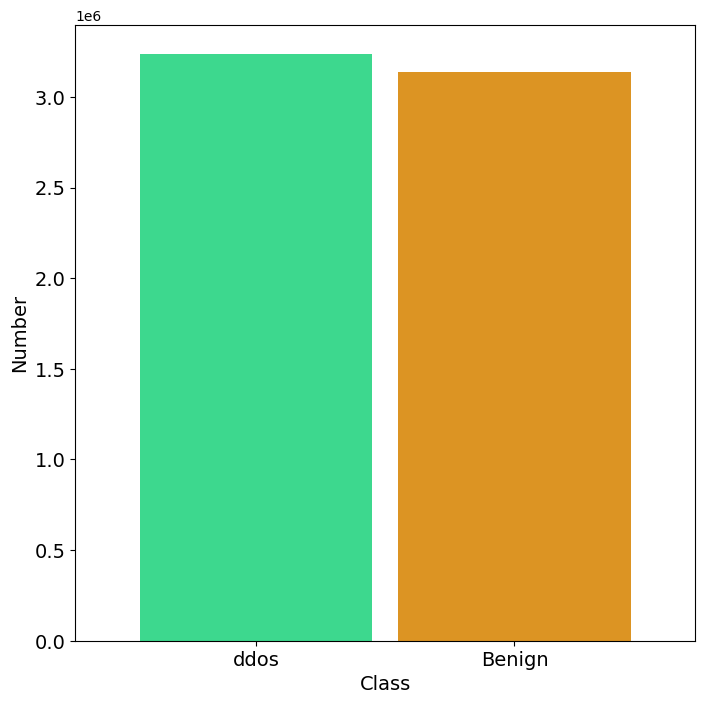

In [36]:
plt.figure(figsize=[8,8])
DDoS_full.Label.value_counts().plot(kind='bar', width=0.9, color=['#3DD88E','#DC9423'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
DDoS_full.shape

(6373397, 85)

In [38]:
X = DDoS_full[bestfeatures_list]
y = DDoS_full['Label_val']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
matrix_labels = ['DDoS','Benign']

In [41]:
algorithms = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost']

In [44]:
metrics_list = []

In [46]:
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42), CatBoostClassifier(task_type="GPU", devices='0:1')]

In [49]:
k = 0
for i in classifiers:
    i.fit(x_train, y_train)        
    y_pred = i.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    metrics_list.append({'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-score': f1,
                        'fpr': fpr,
                        'tpr': tpr})
        
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print('Accuracy: ', accuracy)  
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1-score: ', f1)
    
    k = k + 1                   

Evaluation metrics of Naive Bayes algorithm: 
Accuracy:  0.8963551636489158
Precision:  0.8857528035172941
Recall:  0.9138494609928932
F1-score:  0.8995817998567996


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics of Logistic Regression algorithm: 
Accuracy:  0.983571301555423
Precision:  0.9709402360335462
Recall:  0.9975157594332679
F1-score:  0.9840486037196228
Evaluation metrics of Decision tree algorithm: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
Evaluation metrics of Random Forest algorithm: 
Accuracy:  0.9999963389504294
Precision:  0.9999989704710507
Recall:  0.9999938228581018
F1-score:  0.9999963966579518
Evaluation metrics of XGBoost algorithm: 
Accuracy:  0.9999994769929185
Precision:  0.9999989704774103
Recall:  1.0
F1-score:  0.9999994852384402
Learning rate set to 0.021235
0:	learn: 0.6043155	total: 68.2ms	remaining: 1m 8s
1:	learn: 0.5260394	total: 133ms	remaining: 1m 6s
2:	learn: 0.4564321	total: 201ms	remaining: 1m 6s
3:	learn: 0.3841366	total: 281ms	remaining: 1m 10s
4:	learn: 0.3243522	total: 393ms	remaining: 1m 18s
5:	learn: 0.2738751	total: 439ms	remaining: 1m 12s
6:	learn: 0.2429567	total: 484ms	remaining: 1m 8s
7:	learn: 0.2060847	tota

151:	learn: 0.0017223	total: 7.45s	remaining: 41.6s
152:	learn: 0.0017191	total: 7.48s	remaining: 41.4s
153:	learn: 0.0016897	total: 7.52s	remaining: 41.3s
154:	learn: 0.0016708	total: 7.55s	remaining: 41.2s
155:	learn: 0.0016437	total: 7.59s	remaining: 41s
156:	learn: 0.0016311	total: 7.62s	remaining: 40.9s
157:	learn: 0.0016065	total: 7.66s	remaining: 40.8s
158:	learn: 0.0015979	total: 7.69s	remaining: 40.7s
159:	learn: 0.0015750	total: 7.73s	remaining: 40.6s
160:	learn: 0.0015714	total: 7.76s	remaining: 40.4s
161:	learn: 0.0015644	total: 7.79s	remaining: 40.3s
162:	learn: 0.0015582	total: 7.82s	remaining: 40.2s
163:	learn: 0.0015370	total: 7.86s	remaining: 40s
164:	learn: 0.0015348	total: 7.89s	remaining: 39.9s
165:	learn: 0.0015278	total: 7.92s	remaining: 39.8s
166:	learn: 0.0015245	total: 7.96s	remaining: 39.7s
167:	learn: 0.0015189	total: 7.99s	remaining: 39.6s
168:	learn: 0.0015086	total: 8.02s	remaining: 39.4s
169:	learn: 0.0015062	total: 8.05s	remaining: 39.3s
170:	learn: 0.00

311:	learn: 0.0009035	total: 12.7s	remaining: 28s
312:	learn: 0.0008999	total: 12.7s	remaining: 27.9s
313:	learn: 0.0008961	total: 12.7s	remaining: 27.9s
314:	learn: 0.0008953	total: 12.8s	remaining: 27.8s
315:	learn: 0.0008897	total: 12.8s	remaining: 27.7s
316:	learn: 0.0008838	total: 12.8s	remaining: 27.7s
317:	learn: 0.0008819	total: 12.9s	remaining: 27.6s
318:	learn: 0.0008796	total: 12.9s	remaining: 27.6s
319:	learn: 0.0008779	total: 13s	remaining: 27.5s
320:	learn: 0.0008769	total: 13s	remaining: 27.5s
321:	learn: 0.0008752	total: 13s	remaining: 27.4s
322:	learn: 0.0008725	total: 13s	remaining: 27.3s
323:	learn: 0.0008674	total: 13.1s	remaining: 27.3s
324:	learn: 0.0008648	total: 13.1s	remaining: 27.2s
325:	learn: 0.0008642	total: 13.1s	remaining: 27.2s
326:	learn: 0.0008630	total: 13.2s	remaining: 27.1s
327:	learn: 0.0008582	total: 13.2s	remaining: 27.1s
328:	learn: 0.0008567	total: 13.2s	remaining: 27s
329:	learn: 0.0008523	total: 13.3s	remaining: 27s
330:	learn: 0.0008513	tota

471:	learn: 0.0006218	total: 17.9s	remaining: 20s
472:	learn: 0.0006209	total: 17.9s	remaining: 20s
473:	learn: 0.0006192	total: 17.9s	remaining: 19.9s
474:	learn: 0.0006182	total: 18s	remaining: 19.9s
475:	learn: 0.0006181	total: 18s	remaining: 19.8s
476:	learn: 0.0006176	total: 18s	remaining: 19.8s
477:	learn: 0.0006167	total: 18.1s	remaining: 19.7s
478:	learn: 0.0006143	total: 18.1s	remaining: 19.7s
479:	learn: 0.0006140	total: 18.1s	remaining: 19.6s
480:	learn: 0.0006130	total: 18.2s	remaining: 19.6s
481:	learn: 0.0006126	total: 18.2s	remaining: 19.6s
482:	learn: 0.0006112	total: 18.2s	remaining: 19.5s
483:	learn: 0.0006106	total: 18.3s	remaining: 19.5s
484:	learn: 0.0006084	total: 18.3s	remaining: 19.4s
485:	learn: 0.0006073	total: 18.3s	remaining: 19.4s
486:	learn: 0.0006052	total: 18.4s	remaining: 19.3s
487:	learn: 0.0006034	total: 18.4s	remaining: 19.3s
488:	learn: 0.0006016	total: 18.4s	remaining: 19.3s
489:	learn: 0.0006012	total: 18.5s	remaining: 19.2s
490:	learn: 0.0006002	

630:	learn: 0.0004881	total: 23.2s	remaining: 13.5s
631:	learn: 0.0004876	total: 23.2s	remaining: 13.5s
632:	learn: 0.0004872	total: 23.2s	remaining: 13.5s
633:	learn: 0.0004864	total: 23.3s	remaining: 13.4s
634:	learn: 0.0004863	total: 23.3s	remaining: 13.4s
635:	learn: 0.0004857	total: 23.3s	remaining: 13.4s
636:	learn: 0.0004849	total: 23.4s	remaining: 13.3s
637:	learn: 0.0004841	total: 23.4s	remaining: 13.3s
638:	learn: 0.0004834	total: 23.4s	remaining: 13.2s
639:	learn: 0.0004832	total: 23.5s	remaining: 13.2s
640:	learn: 0.0004829	total: 23.5s	remaining: 13.2s
641:	learn: 0.0004827	total: 23.5s	remaining: 13.1s
642:	learn: 0.0004821	total: 23.6s	remaining: 13.1s
643:	learn: 0.0004815	total: 23.6s	remaining: 13s
644:	learn: 0.0004802	total: 23.6s	remaining: 13s
645:	learn: 0.0004790	total: 23.7s	remaining: 13s
646:	learn: 0.0004784	total: 23.7s	remaining: 12.9s
647:	learn: 0.0004778	total: 23.7s	remaining: 12.9s
648:	learn: 0.0004771	total: 23.8s	remaining: 12.9s
649:	learn: 0.0004

794:	learn: 0.0004125	total: 28.7s	remaining: 7.41s
795:	learn: 0.0004124	total: 28.8s	remaining: 7.37s
796:	learn: 0.0004122	total: 28.8s	remaining: 7.34s
797:	learn: 0.0004121	total: 28.8s	remaining: 7.3s
798:	learn: 0.0004119	total: 28.9s	remaining: 7.26s
799:	learn: 0.0004113	total: 28.9s	remaining: 7.23s
800:	learn: 0.0004110	total: 28.9s	remaining: 7.19s
801:	learn: 0.0004106	total: 29s	remaining: 7.15s
802:	learn: 0.0004100	total: 29s	remaining: 7.12s
803:	learn: 0.0004098	total: 29s	remaining: 7.08s
804:	learn: 0.0004094	total: 29.1s	remaining: 7.04s
805:	learn: 0.0004091	total: 29.1s	remaining: 7.01s
806:	learn: 0.0004088	total: 29.2s	remaining: 6.97s
807:	learn: 0.0004086	total: 29.2s	remaining: 6.93s
808:	learn: 0.0004083	total: 29.2s	remaining: 6.9s
809:	learn: 0.0004069	total: 29.3s	remaining: 6.86s
810:	learn: 0.0004067	total: 29.3s	remaining: 6.82s
811:	learn: 0.0004064	total: 29.3s	remaining: 6.79s
812:	learn: 0.0004059	total: 29.4s	remaining: 6.75s
813:	learn: 0.000405

954:	learn: 0.0003603	total: 34.2s	remaining: 1.61s
955:	learn: 0.0003601	total: 34.2s	remaining: 1.57s
956:	learn: 0.0003600	total: 34.3s	remaining: 1.54s
957:	learn: 0.0003597	total: 34.4s	remaining: 1.51s
958:	learn: 0.0003597	total: 34.4s	remaining: 1.47s
959:	learn: 0.0003595	total: 34.4s	remaining: 1.43s
960:	learn: 0.0003594	total: 34.5s	remaining: 1.4s
961:	learn: 0.0003591	total: 34.5s	remaining: 1.36s
962:	learn: 0.0003588	total: 34.5s	remaining: 1.33s
963:	learn: 0.0003586	total: 34.6s	remaining: 1.29s
964:	learn: 0.0003583	total: 34.6s	remaining: 1.25s
965:	learn: 0.0003580	total: 34.7s	remaining: 1.22s
966:	learn: 0.0003576	total: 34.7s	remaining: 1.18s
967:	learn: 0.0003573	total: 34.7s	remaining: 1.15s
968:	learn: 0.0003572	total: 34.8s	remaining: 1.11s
969:	learn: 0.0003571	total: 34.8s	remaining: 1.08s
970:	learn: 0.0003569	total: 34.9s	remaining: 1.04s
971:	learn: 0.0003567	total: 34.9s	remaining: 1s
972:	learn: 0.0003566	total: 34.9s	remaining: 970ms
973:	learn: 0.00

In [50]:
x_train.shape

(4461377, 20)

In [54]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=20))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), 
                                                                         Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               5376      
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 6, verbose=1, validation_split=0.1)

In [69]:
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Training Accuracy: 0.9991
Testing Accuracy: 0.9991


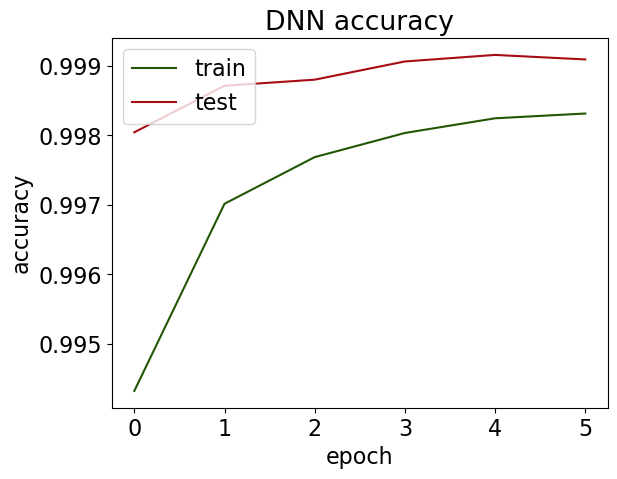

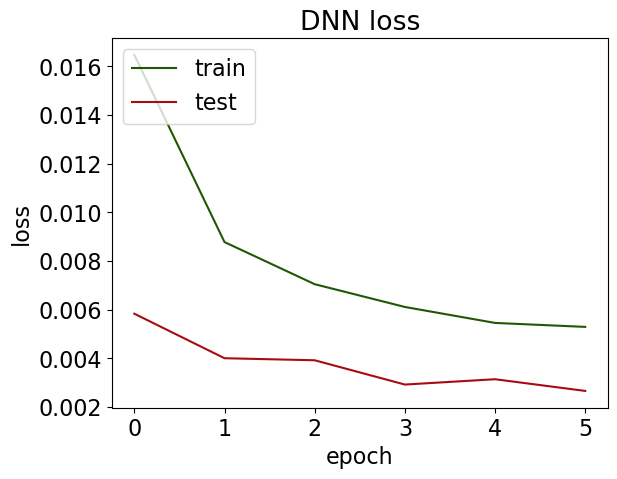

In [56]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
y_pred = model_dnn.predict(x_test)

59751/59751 [==============================] - 85s 1ms/step


In [60]:
y_test

3195888    0
255146     0
1525316    1
2072014    0
2844031    1
          ..
1962401    0
3564748    0
5418351    0
651115     0
6211366    1
Name: Label_val, Length: 1912020, dtype: int32

In [61]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [62]:
y_pred

[0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [65]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9990800305436136
Precision - 0.99899127556293
Recall - 0.9991980010768817
F1-score - 0.9990946276263648


In [70]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [71]:
metrics_list.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1,
                    'fpr': fpr,
                    'tpr': tpr})

In [72]:
metrics_list

[{'Accuracy': 0.8963551636489158,
  'Precision': 0.8857528035172941,
  'Recall': 0.9138494609928932,
  'F1-score': 0.8995817998567996,
  'fpr': array([0.        , 0.12170869, 1.        ]),
  'tpr': array([0.        , 0.91384946, 1.        ])},
 {'Accuracy': 0.983571301555423,
  'Precision': 0.9709402360335462,
  'Recall': 0.9975157594332679,
  'F1-score': 0.9840486037196228,
  'fpr': array([0.        , 0.03082714, 1.        ]),
  'tpr': array([0.        , 0.99751576, 1.        ])},
 {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-score': 1.0,
  'fpr': array([0., 0., 1.]),
  'tpr': array([0., 1., 1.])},
 {'Accuracy': 0.9999963389504294,
  'Precision': 0.9999989704710507,
  'Recall': 0.9999938228581018,
  'F1-score': 0.9999963966579518,
  'fpr': array([0.00000000e+00, 1.06304155e-06, 1.00000000e+00]),
  'tpr': array([0.        , 0.99999382, 1.        ])},
 {'Accuracy': 0.9999994769929185,
  'Precision': 0.9999989704774103,
  'Recall': 1.0,
  'F1-score': 0.9999994852384402,
 

In [73]:
ML_DNN_models = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost','DNN']

In [75]:
data_bar = pd.DataFrame(metrics_list, index=ML_DNN_models)

In [80]:
data_fpr_tpr = pd.DataFrame(metrics_list, index=ML_DNN_models)
data_fpr_tpr.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [77]:
data_bar.drop(['fpr','tpr'], axis=1, inplace=True)

In [81]:
tpr_list = data_fpr_tpr['tpr'].to_list()
fpr_list = data_fpr_tpr['fpr'].to_list()

In [87]:
auc_roc_list = []

In [88]:
for i in range(len(tpr_list)):
    auc_roc_list.append(metrics.auc(fpr_list[i], tpr_list[i]))

In [89]:
auc_roc_list

[0.8960703852609455,
 0.983344308715557,
 1.0,
 0.9999963799082743,
 0.9999994684792234,
 0.9998979024997143,
 0.9990781101773576]

In [98]:
clrs2 = ['green',  'yellow', 'orange', 'red', 'blue', 'cyan', 'brown']

In [112]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar["Accuracy"].values,
    "Precision": data_bar["Precision"].values,
    "Recall": data_bar["Recall"].values,
    "F1-score": data_bar["F1-score"].values
    },
    index=["Naive Bayes","Logistic Regression","Decision tree","Random Forest","XGBoost","CatBoost","DNN"]
)

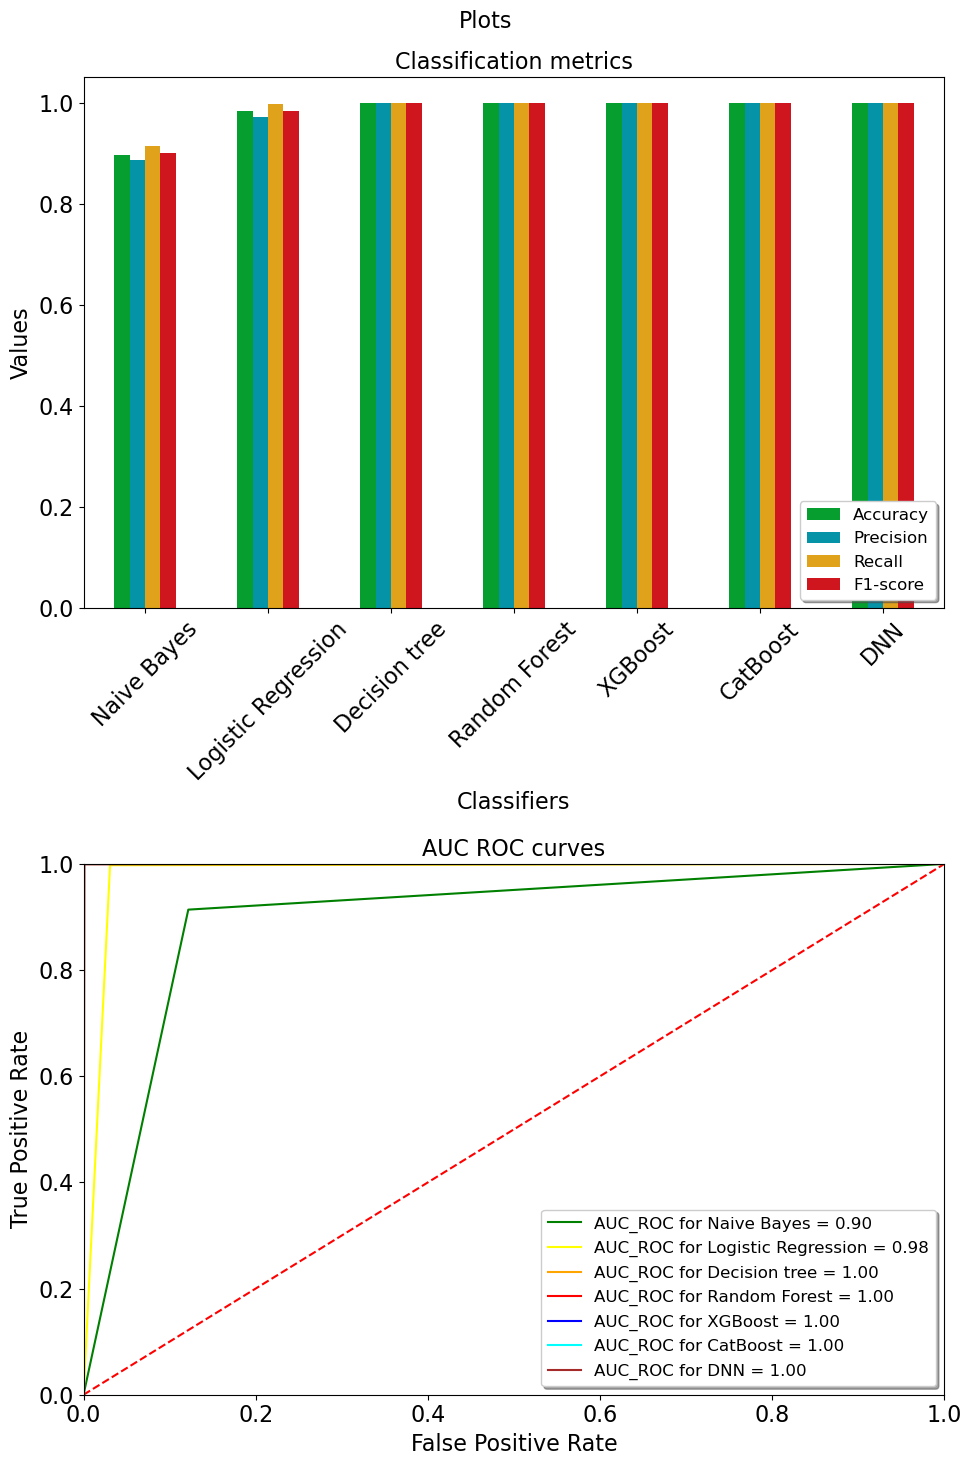

In [135]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#069e2f',  '#0593a8', '#e0a21b', '#cf151e']
data_bar.plot(kind="bar", ax=axes[0], color=clrs, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 16)
axes[0].set_ylabel('Values', fontsize = 16)
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 16)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 16)
axes[1].set_xlabel('False Positive Rate', fontsize = 16)
for i in range(len(auc_roc_list)):
    axes[1].plot(fpr_list[i], tpr_list[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)
fig.tight_layout()
plt.show()